# Python: Simple Panel Data Example

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression

from doubleml.data import DoubleMLPanelData
from doubleml.did import DoubleMLDIDMulti

In [2]:
import pandas as pd
import numpy as np
dta = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/csdid/main/data/sim_data.csv")
dta.head()
dta.loc[dta["G"] == 0, "G"] = np.nan

In [3]:
dml_data = DoubleMLPanelData(dta, y_col="Y", d_cols="G", id_col="id", t_col="period", x_cols=["X"])

In [4]:
control_group = "not_yet_treated"
control_group = "never_treated"

ml_g=LinearRegression()
ml_m=LogisticRegression()

# ml_g = LGBMRegressor()
# ml_m = LGBMClassifier()

dml_obj = DoubleMLDIDMulti(
    obj_dml_data=dml_data,
    ml_g=ml_g,
    ml_m=ml_m,
    gt_combinations="standard",
    control_group=control_group,
)

dml_obj.fit()
dml_obj.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
"ATT(2.0,1,2)",0.920815,0.063970,14.394375,0.000000,0.795435,1.046195
"ATT(2.0,1,3)",1.983448,0.064744,30.635238,0.000000,1.856552,2.110344
"ATT(2.0,1,4)",2.956340,0.063267,46.728168,0.000000,2.832340,3.080341
"ATT(3.0,1,2)",-0.044035,0.065853,-0.668684,0.503697,-0.173105,0.085035
"ATT(3.0,2,3)",1.105935,0.065468,16.892674,0.000000,0.977620,1.234251
"ATT(3.0,2,4)",2.065059,0.065618,31.471099,0.000000,1.936451,2.193667
"ATT(4.0,1,2)",0.000656,0.068395,0.009596,0.992344,-0.133395,0.134707
"ATT(4.0,2,3)",0.062161,0.066457,0.935357,0.349604,-0.068092,0.192414
"ATT(4.0,3,4)",0.951881,0.067878,14.023318,0.000000,0.818842,1.084920


/opt/venv/lib/python3.12/site-packages/doubleml/did/did_multi.py:1298: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(
/opt/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/opt/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


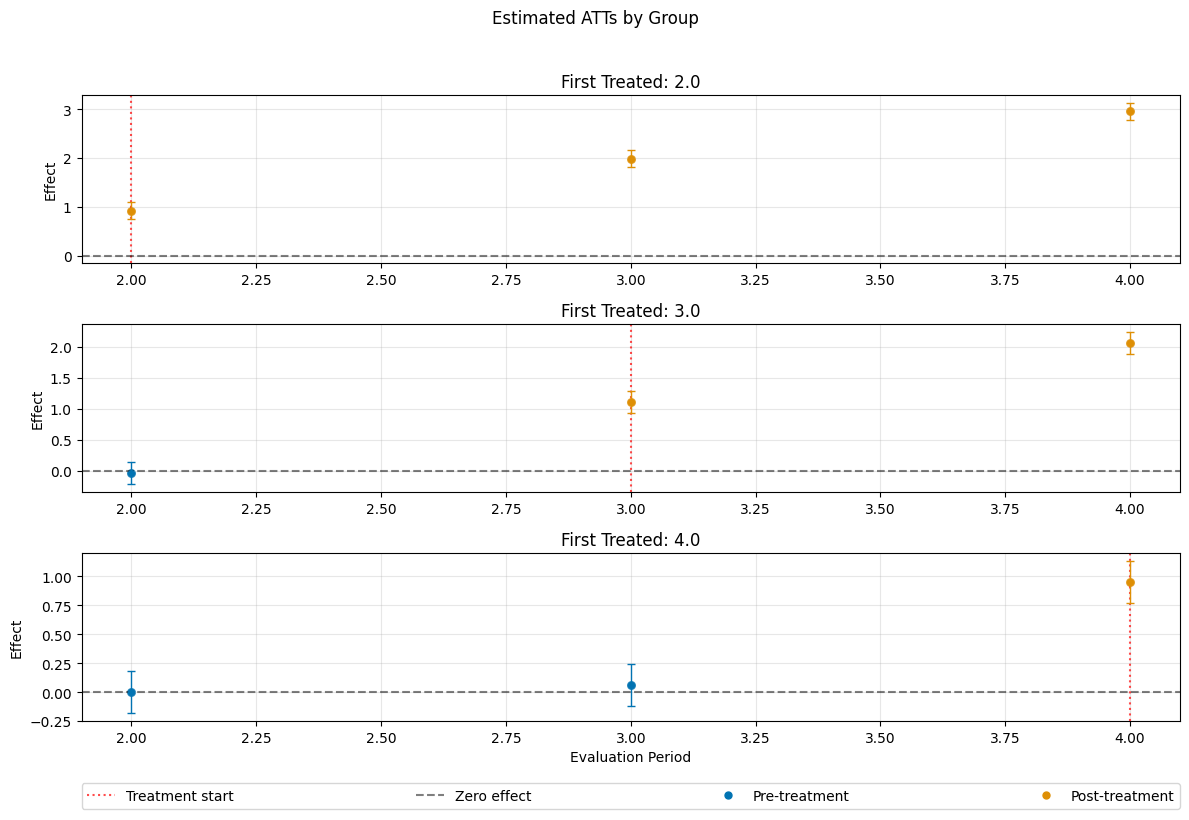

In [5]:
fig, ax = dml_obj.plot_effects()

In [6]:
level = 0.95

ci = dml_obj.confint(level=level)
dml_obj.bootstrap(n_rep_boot=5000)
ci_joint = dml_obj.confint(level=level, joint=True)

In [7]:
print(dml_obj)

================== DoubleMLDIDMulti Object ==================

------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): ['G']
Covariates: ['X']
Instrument variable(s): None
Time variable: period
Id variable: id
No. Observations: 3979

------------------ Score & algorithm ------------------
Score function: observational
Control group: never_treated
Anticipation periods: 0

------------------ Machine learner   ------------------
Learner ml_g: LinearRegression()
Learner ml_m: LogisticRegression()
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[1.42395531 1.41102464 1.40193447 1.42414489 1.40480083 1.42114621
  1.42658311 1.4065011  1.42432406]]
Learner ml_g1 RMSE: [[1.40260415 1.44143708 1.40004539 1.41289911 1.4243203  1.38294772
  1.45655191 1.41725691 1.40904307]]
Classification:
Learner ml_m Log Loss: [[0.69042286 0.69154849 0.69040404 0.68002834 0.67987763 0.679984
  0.66215109 0.66199744 0.66241892]]

------------------ Resampli

================== DoubleMLDIDAggregation Object ==================
 Group Aggregation 

------------------ Overall Aggregated Effects ------------------
    coef  std err         t  P>|t|  2.5 %   97.5 %
1.488207 0.034341 43.336421    0.0 1.4209 1.555514
------------------ Aggregated Effects         ------------------
         coef   std err          t  P>|t|     2.5 %    97.5 %
2.0  1.953534  0.052242  37.393827    0.0  1.851142  2.055927
3.0  1.585497  0.056338  28.142811    0.0  1.475077  1.695917
4.0  0.951881  0.067878  14.023318    0.0  0.818842  1.084920
------------------ Additional Information     ------------------
Control Group: never_treated
Anticipation Periods: 0
Score: observational



/opt/venv/lib/python3.12/site-packages/doubleml/did/did_aggregation.py:328: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.aggregated_frameworks.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(


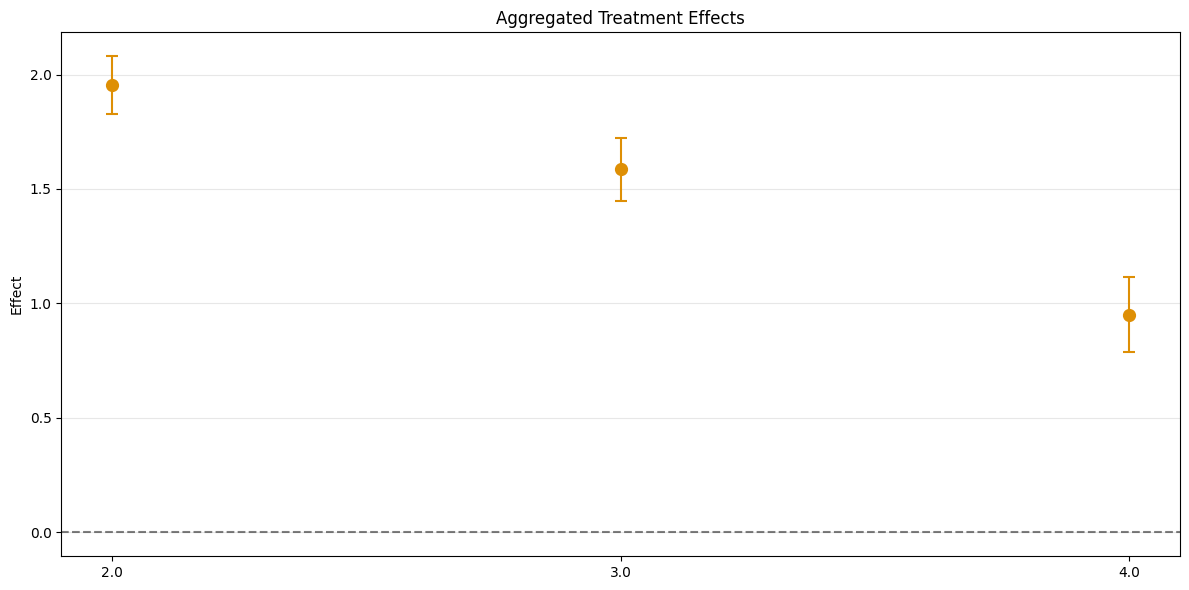

In [8]:
aggregated = dml_obj.aggregate("group")
print(aggregated)
fig, ax = aggregated.plot_effects()

================== DoubleMLDIDAggregation Object ==================
 Time Aggregation 

------------------ Overall Aggregated Effects ------------------
    coef  std err         t  P>|t|    2.5 %   97.5 %
1.480476 0.035087 42.194475    0.0 1.411707 1.549245
------------------ Aggregated Effects         ------------------
       coef   std err          t  P>|t|     2.5 %    97.5 %
2  0.920815  0.063970  14.394375    0.0  0.795435  1.046195
3  1.546038  0.051435  30.058040    0.0  1.445227  1.646848
4  1.974576  0.046775  42.214387    0.0  1.882899  2.066254
------------------ Additional Information     ------------------
Control Group: never_treated
Anticipation Periods: 0
Score: observational



/opt/venv/lib/python3.12/site-packages/doubleml/did/did_aggregation.py:328: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.aggregated_frameworks.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(


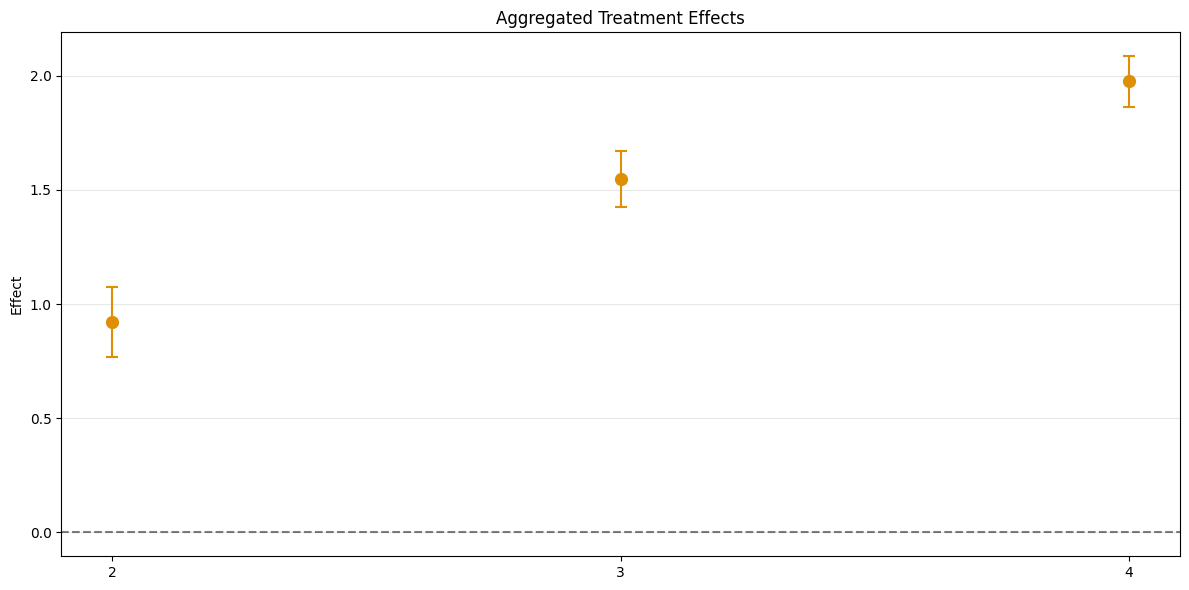

In [9]:
aggregated_time = dml_obj.aggregate("time")
print(aggregated_time)
fig, ax = aggregated_time.plot_effects()

================== DoubleMLDIDAggregation Object ==================
 Event Study Aggregation 

------------------ Overall Aggregated Effects ------------------
    coef  std err         t  P>|t|    2.5 %   97.5 %
1.990824 0.038762 51.360161    0.0 1.914852 2.066796
------------------ Aggregated Effects         ------------------
          coef   std err          t     P>|t|     2.5 %    97.5 %
-2.0  0.000656  0.068395   0.009596  0.992344 -0.133395  0.134707
-1.0  0.010468  0.040478   0.258610  0.795937 -0.068867  0.089803
0.0   0.992004  0.030775  32.233848  0.000000  0.931686  1.052322
1.0   2.024128  0.045782  44.212165  0.000000  1.934397  2.113860
2.0   2.956340  0.063267  46.728168  0.000000  2.832340  3.080341
------------------ Additional Information     ------------------
Control Group: never_treated
Anticipation Periods: 0
Score: observational



/opt/venv/lib/python3.12/site-packages/doubleml/did/did_aggregation.py:328: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.aggregated_frameworks.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(


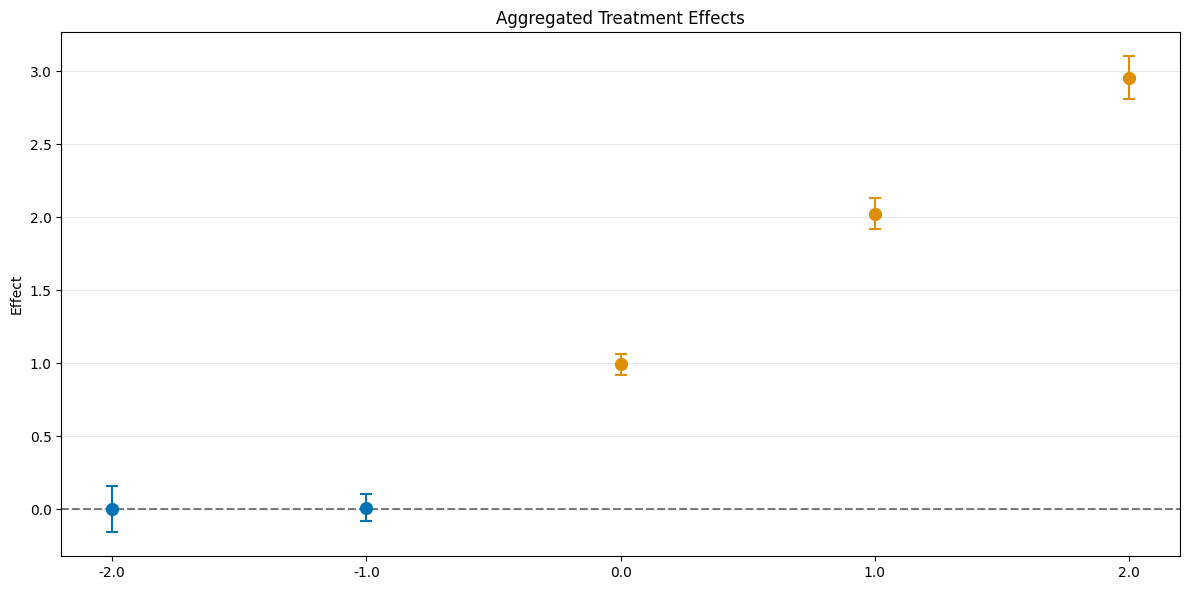

In [10]:
aggregated_eventstudy = dml_obj.aggregate("eventstudy")
print(aggregated_eventstudy)
fig, ax = aggregated_eventstudy.plot_effects()